In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model,Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings 
from warnings import filterwarnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=UserWarning)
filterwarnings('ignore')

In [38]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [39]:
print("Train Sets Size: ",x_train.shape,y_train.shape)

Train Sets Size:  (60000, 28, 28) (60000,)


In [40]:
print("Test Sets Size: ",x_test.shape,y_test.shape)

Test Sets Size:  (10000, 28, 28) (10000,)


In [41]:
num_labels = len(np.unique(y_train))
print(f"Sum of unique depended values is =>{num_labels}")

Sum of unique depended values is =>10


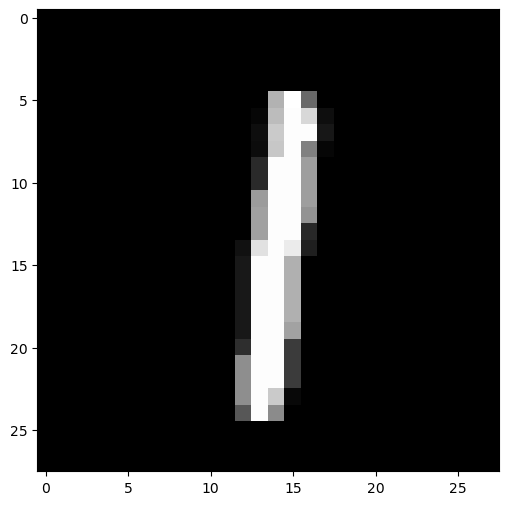

In [42]:
## If you want to see any a data from the dataset you can see it as belows,Value is changeable
plt.figure(figsize=(6,6))
plt.imshow(x_train[40],cmap='gray')

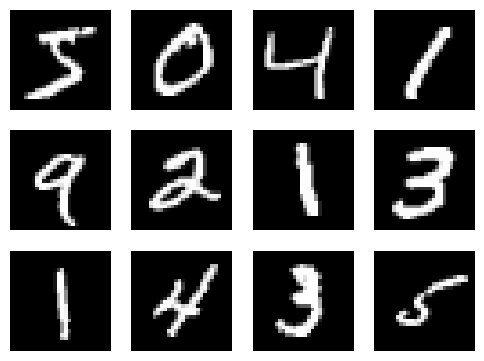

In [43]:
## if you want to see a lot of image you can try see inside for loops
plt.figure(figsize=(6,6))
for n in range(12):
    ax = plt.subplot(4,4,n+1)
    plt.imshow(x_train[n], cmap = 'gray')
    plt.axis('off')

In [44]:
def visualize_img(data):
    plt.figure(figsize=(6,6))
    for n in range(10):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(x_train[n], cmap = 'gray')
        plt.axis('off')

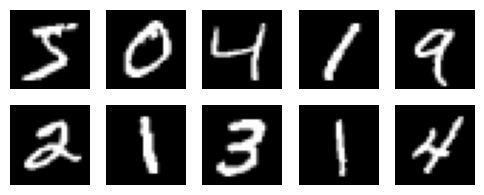

In [45]:
visualize_img(x_train)

In [46]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [47]:
x_train[2][10,10]

0

In [48]:
x_train[2][14,10]

49

In [49]:
x_train[2].mean()

24.799744897959183

In [50]:
x_train[2].sum()

19443

In [54]:
x_train[2][14:10, 10:20]

array([], shape=(0, 10), dtype=uint8)

In [55]:
x_train[2][14:10, 10:14].mean()

nan

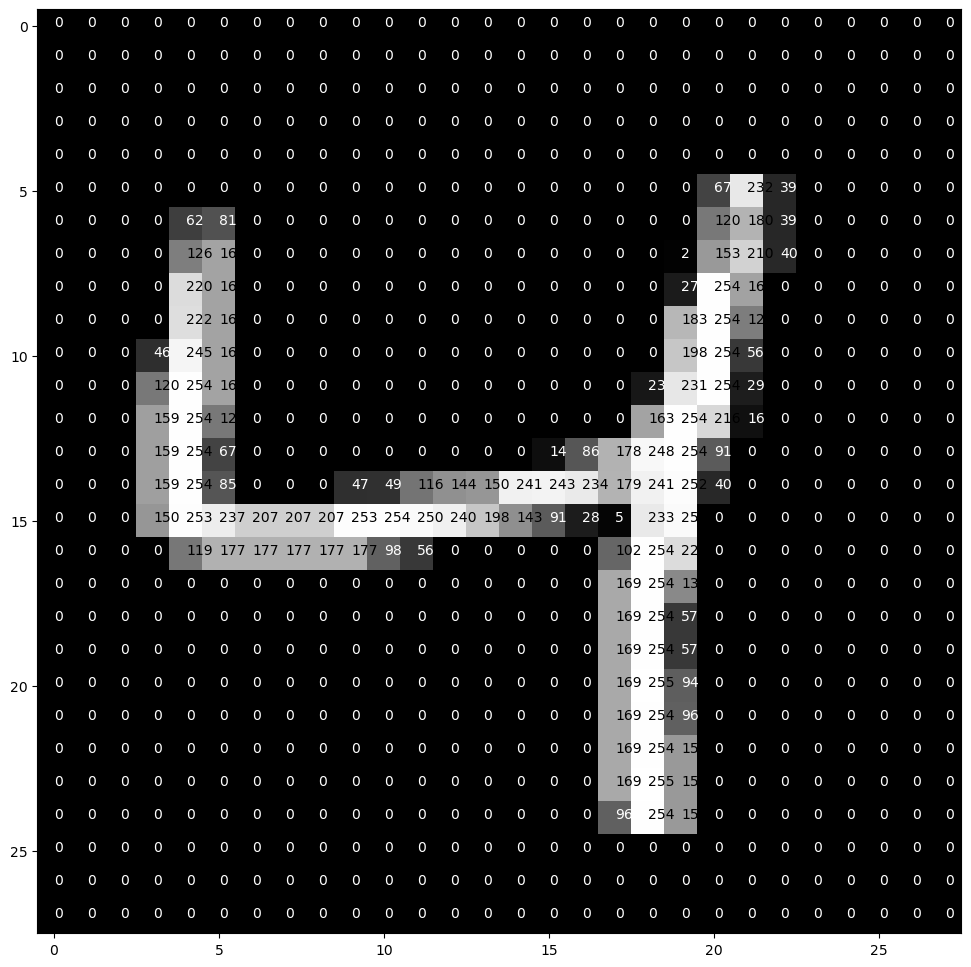

In [65]:
def pixel_visualize(img):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    ax.imshow(img ,cmap = 'gray')
    width, height = img.shape
    
    threshold = img.max() / 2.5
    
    for x in range(width):
        for y in range(height):
            
            ax.annotate(str(round(img[x][y], 20)), xy = (y,x),color = 'white' if img[x][y]<threshold else 'black')
pixel_visualize(x_train[2])

In [66]:
## Encoding for depended value

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [67]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [68]:
## It discusses how to implement re-import on the dataset.
## purpuse: we need to implement pixels programmatically
img_size = x_train.shape[1]
img_size

28

In [69]:
## this results have not pixel information as see 
print(f'x_train size: {x_train.shape}')
print(f'x_test size: {x_test.shape}')

x_train size: (60000, 28, 28)
x_test size: (10000, 28, 28)


In [70]:
## Reshaping
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
print(f'x_train size: {x_train.shape}')
print(f'x_test size: {x_test.shape}')

x_train size: (60000, 28, 28, 1)
x_test size: (10000, 28, 28, 1)


In [71]:
## standartization process
## why that is required? Pulling the values in the data between 0 and 1 will allow us to be faster.ANN effect will be positive
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [74]:
## Modelling
model = tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units=128, activation='relu',name='layer1'),
    Dense(units=num_labels, activation='softmax',name='output_layer')])

In [76]:
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),"accuracy"])

In [78]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [81]:
histoty = model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0113 - precision_2: 0.9980 - recall_2: 0.9973 - accuracy: 0.9977 - val_loss: 0.0811 - val_precision_2: 0.9800 - val_recall_2: 0.9770 - val_accuracy: 0.9783
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0099 - precision_2: 0.9981 - recall_2: 0.9977 - accuracy: 0.9980 - val_loss: 0.0782 - val_precision_2: 0.9805 - val_recall_2: 0.9784 - val_accuracy: 0.9790
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0091 - precision_2: 0.9983 - recall_2: 0.9977 - accuracy: 0.9980 - val_loss: 0.0809 - val_precision_2: 0.9799 - val_recall_2: 0.9777 - val_accuracy: 0.9786
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0077 - precision_2: 0.9988 - recall_2: 0.9986 - accuracy: 0.9987 - val_loss: 0.0819 - val_precision_2: 0.9818 - val_recall_2: 0.9798 - val_accuracy: 0.9802
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss

Text(0.5, 1.0, 'Eğitim ve Test Kayıp Grafiği')

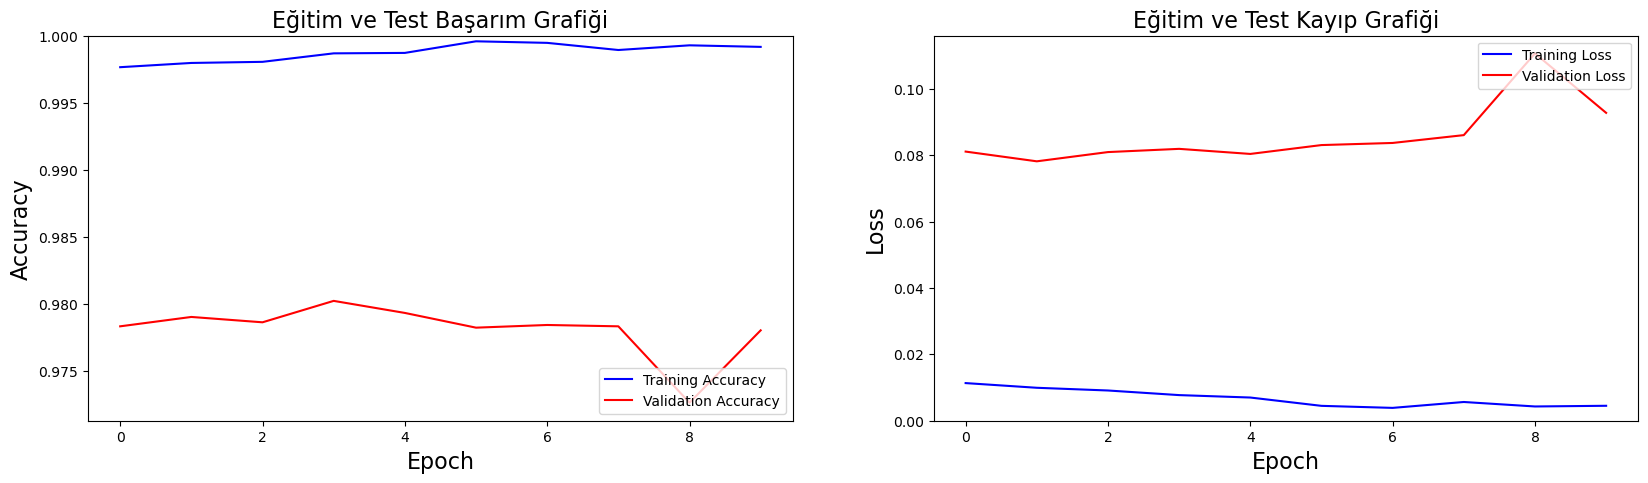

In [87]:
#-----------------------Graph 1 Accuracy-----------------------------#

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.plot(histoty.history['accuracy'], color='b', label = 'Training Accuracy')
plt.plot(histoty.history['val_accuracy'], color='r', label = 'Validation Accuracy')
plt.legend(loc= 'lower right')
plt.xlabel('Epoch',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.ylim((min(plt.ylim()),1))
plt.title('Eğitim ve Test Başarım Grafiği',fontsize=16)

#-----------------------Graph 1 Loss-----------------------------#

plt.subplot(1,2,2)
plt.plot(histoty.history['loss'], color='b', label = 'Training Loss')
plt.plot(histoty.history['val_loss'], color='r', label = 'Validation Loss')
plt.legend(loc= 'upper right')
plt.xlabel('Epoch',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.ylim((0,max(plt.ylim())))
plt.title('Eğitim ve Test Kayıp Grafiği',fontsize=16)

In [103]:
loss,precision,recall,acc = model.evaluate(x_test,y_test,verbose=False)
print("*"*120)
print(" "*40,"Evaluation of Model")
print("\nTest Accuracy: %1f%%"%(100.0*acc))
print("\nTest Loss: %1f%%"%(100.0*loss))
print("\nTest Precision: %1f%%"%(100.0*precision))
print("\nTest Recall: %1f%%"%(100.0*recall))
print("\n ")
print("*"*120)

************************************************************************************************************************
                                         Evaluation of Model

Test Accuracy: 97.799999%

Test Loss: 9.276945%

Test Precision: 97.916460%

Test Recall: 97.750002%

 
************************************************************************************************************************


In [104]:
## Predict 
import random 

random = random.randint(0,x_test.shape[0])
random

7120

In [105]:
test_image = x_test[random]

In [106]:
y_test[random]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

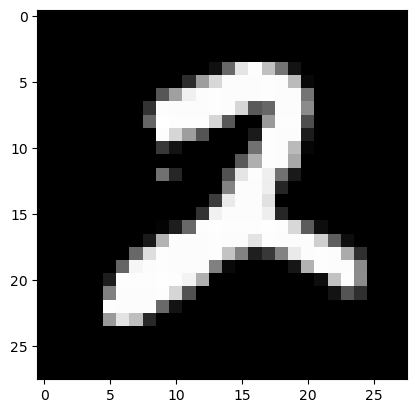

In [107]:
plt.imshow(test_image.reshape(28,28),cmap='gray')

In [108]:
test_data = x_test[random].reshape(1,28,28,1)

In [113]:
pred = model.predict(test_data)
print(" ")
print(" "*20,"Probabilities Values  ")
pred

1/1 [==============================] - 0s 16ms/step
 
                     Probabilities Values  


array([[2.9458319e-14, 2.2877640e-09, 9.9999988e-01, 3.9003435e-08,
        1.5641971e-22, 4.4672758e-18, 6.3701086e-21, 5.3552291e-08,
        1.8751325e-11, 2.6252870e-16]], dtype=float32)

In [118]:
pred_classes = np.argmax(pred)

print(f"Predicted of classess => {pred_classes}")
print(f"Probabilities Values to predicted of classess  => {np.max(pred,axis=-1)[0]} \n")
print(f"Probabilities Values other classes => \n{pred}")

Predicted of classess => 2
Probabilities Values to predicted of classess  => 0.9999998807907104 

Probabilities Values other classes => 
[[2.9458319e-14 2.2877640e-09 9.9999988e-01 3.9003435e-08 1.5641971e-22
  4.4672758e-18 6.3701086e-21 5.3552291e-08 1.8751325e-11 2.6252870e-16]]
